Hussein Hamie
500876254
AER 850 Machine Learning
Assignment 3

# Importing Libraries

In [1]:
import pandas as pd
import sys
import scipy.io
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn
import numpy as np
import sklearn
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from keras.layers import Dense, Dropout
np.set_printoptions(threshold=sys.maxsize)
tf.config.experimental.enable_tensor_float_32_execution(False)

ModuleNotFoundError: No module named 'pandas'

# Loading in Data

In [ ]:
baselineDE = pd.read_excel('/baseline.xlsx',sheet_name="Baseline DE")

baseline007DE = pd.read_excel('/baseline.xlsx',sheet_name="0.007 DE")

baseline021DE = pd.read_excel('/baseline.xlsx',sheet_name="0.021 DE")

In [ ]:
baselineDE.head()

,Baseline 0HP DE X97,Baseline 1HP DE X98,Baseline 2HP DE X99,Baseline 3HP DE
0,0.053197,0.145667,0.064254,0.014603
1,0.088662,0.097796,0.063002,0.054449
2,0.099718,0.054856,-0.004381,0.107646
3,0.058621,0.036982,-0.035882,0.133722
4,-0.004590,0.054445,-0.023991,0.112652


In [ ]:
baselineDE.insert(0, 'Fault', 0)
baselineDE = baselineDE.rename(columns={'Baseline 0HP DE X97':'0HP','Baseline 1HP DE X98':'1HP','Baseline 2HP DE X99':'2HP','Baseline 3HP DE':'3HP'})
baselineDE.head()

,Fault,0HP,1HP,2HP,3HP
0,0,0.053197,0.145667,0.064254,0.014603
1,0,0.088662,0.097796,0.063002,0.054449
2,0,0.099718,0.054856,-0.004381,0.107646
3,0,0.058621,0.036982,-0.035882,0.133722
4,0,-0.004590,0.054445,-0.023991,0.112652


In [ ]:
baseline007DE.insert(0,'Fault',1)
baseline007DE = baseline007DE.rename(columns={'12K 0.007" 0HP':'0HP','12K 0.007" 1HP':'1HP','12K 0.007" 2HP':'2HP','12K 0.007" 3HP':'3HP'})
baseline007DE.head()

,Fault,0HP,1HP,2HP,3HP
0,1,-0.083004,-0.277602,-0.093238,0.222699
1,1,-0.195734,-0.044345,0.187288,0.093238
2,1,0.233419,0.117603,0.217663,-0.146516
3,1,0.103958,-0.145055,0.070172,0.177217
4,1,-0.181115,-0.111430,0.100385,0.248526


In [ ]:
baseline021DE.insert(0,'Fault',1)
baseline021DE = baseline021DE.rename(columns={'12K 0.021" 0HP':'0HP','12K 0.021" 1HP':'1HP','12K 0.021" 2HP':'2HP','12K 0.021" 3HP':'3HP'})
baseline021DE.head()

,Fault,0HP,1HP,2HP,3HP
0,1,1.189431,0.171369,-0.402027,-0.206293
1,1,-0.177866,0.117765,0.548219,-0.007310
2,1,-0.774816,-0.097055,0.931565,0.222536
3,1,0.501518,0.009746,-0.218881,-0.005685
4,1,0.993697,0.060913,-1.079788,0.031675


In [ ]:
faultdata = pd.concat([baselineDE,baseline007DE,baseline021DE])
faultdata.head()

,Fault,0HP,1HP,2HP,3HP
0,0,0.053197,0.145667,0.064254,0.014603
1,0,0.088662,0.097796,0.063002,0.054449
2,0,0.099718,0.054856,-0.004381,0.107646
3,0,0.058621,0.036982,-0.035882,0.133722
4,0,-0.004590,0.054445,-0.023991,0.112652


In [ ]:
def plot_columns(dataframe_cols):
    fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16, 9), sharey=True)
    colors = plt.cm.get_cmap('Set1', len(axes[0]))
    for i, ax in enumerate(axes.flatten()):
        if i < len(dataframe_cols):
            col = dataframe_cols[i]
            ax.scatter(col.index, col.values, s=0.05, color=colors(i % len(axes[0])))
            ax.set_title(col.name)
        else:
            ax.set_visible(False)
    for i, ax in enumerate(axes[:, 0]):
        if i == 0:
            ax.set_ylabel('normal', rotation=0, fontsize='large', labelpad=40)
        elif i == 1:
            ax.set_ylabel('0.0071 fault', rotation=0, fontsize='large', labelpad=40)
        elif i == 2:
            ax.set_ylabel('0.021 fault', rotation=0, fontsize='large', labelpad=40)
    plt.tight_layout()
    plt.show()

<ipython-input-14-c94ba22c6389>:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('Set1', len(axes[0]))


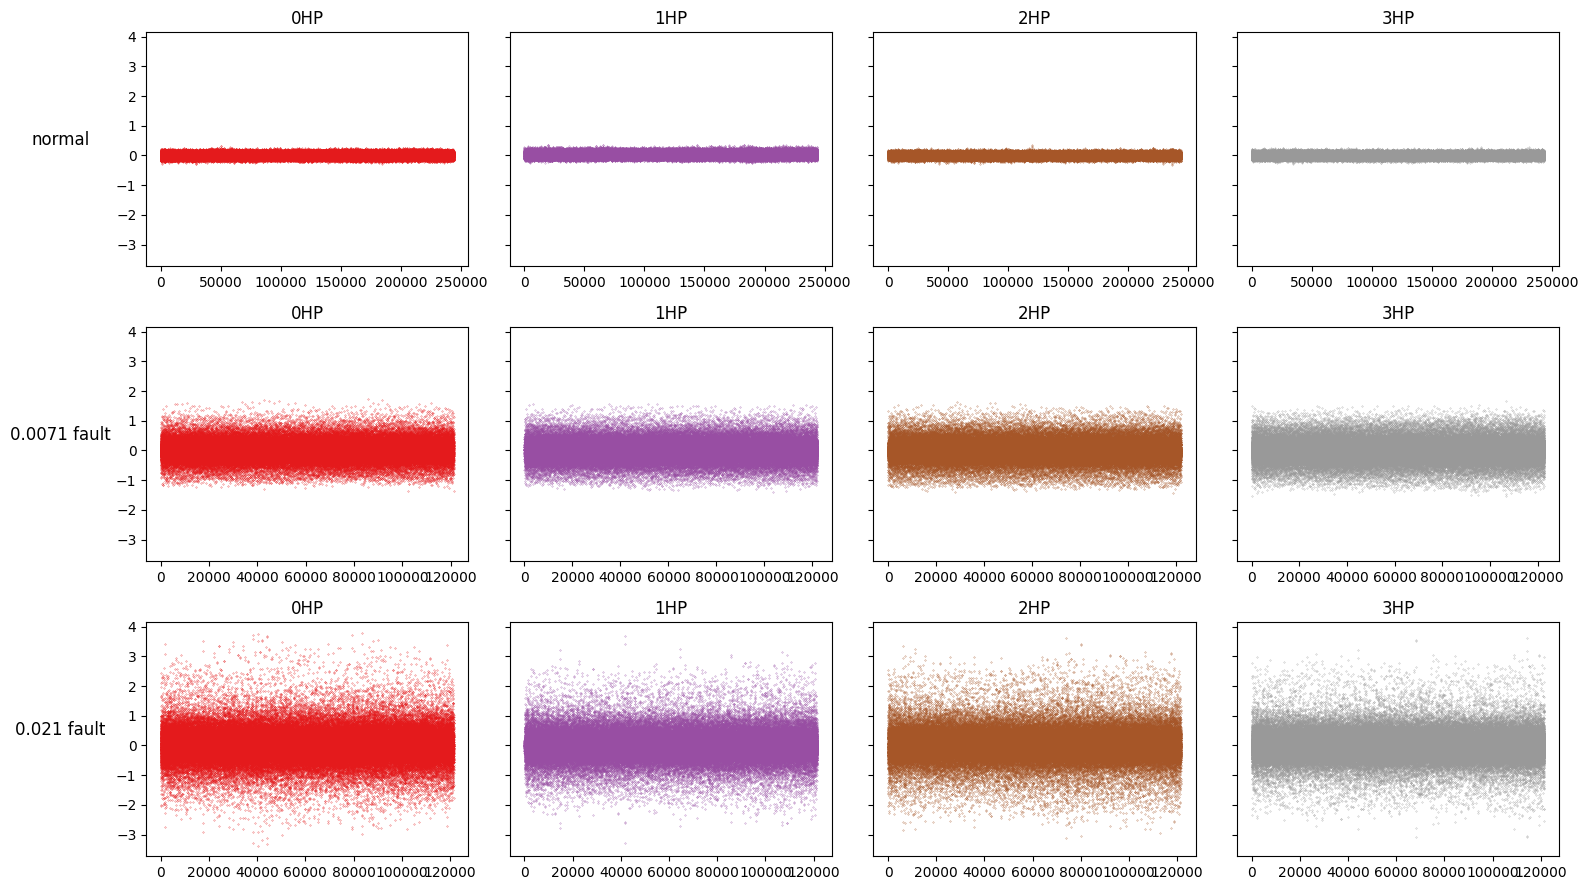

In [ ]:
listsofdatas= [baselineDE['0HP'],baselineDE['1HP'],baselineDE['2HP'],baselineDE['3HP'],baseline007DE['0HP'],baseline007DE['1HP'],baseline007DE['2HP'],baseline007DE['3HP'],baseline021DE['0HP'],baseline021DE['1HP'],baseline021DE['2HP'],baseline021DE['3HP']]
plot_columns(listsofdatas)

In [ ]:
def transpose_and_add_fault_column(df,fault):
    # drop 'Fault' column (if it exists)
    if 'Fault' in df.columns:
        df = df.drop(columns=['Fault'])

    # transpose DataFrame
    df = pd.DataFrame(df.values.T, index=df.columns, columns=df.index)

    # add 'Fault' column with all values set to the fault
    # df.insert(0, 'Fault', fault)

    # return the modified DataFrame
    return df

In [ ]:
trans_baselineDE, trans_baseline007DE, trans_baseline021DE = transpose_and_add_fault_column(baselineDE,0),transpose_and_add_fault_column(baseline007DE,1),transpose_and_add_fault_column(baseline021DE,1)

In [ ]:
df = pd.concat([trans_baselineDE, trans_baseline007DE, trans_baseline021DE],axis=0)

In [ ]:
mask = df.isna()
first_nan_index = mask.any(axis=0).idxmax()
print(first_nan_index)

121265


In [ ]:
data=df.iloc[:,:first_nan_index]
data

,0,1,2,3,4,5,6,7,8,9,...,121255,121256,121257,121258,121259,121260,121261,121262,121263,121264
0HP,0.053197,0.088662,0.099718,0.058621,-0.004590,-0.056952,-0.071764,-0.058621,-0.046521,-0.049859,...,0.027954,-0.024825,-0.088244,-0.135391,-0.147908,-0.109523,-0.025034,0.027954,0.083029,0.128090
1HP,0.145667,0.097796,0.054856,0.036982,0.054445,0.021162,-0.003698,-0.010684,0.029380,0.104576,...,-0.145256,-0.118753,-0.078689,-0.005136,0.041502,0.033900,0.037393,0.057733,0.061431,0.034311
2HP,0.064254,0.063002,-0.004381,-0.035882,-0.023991,0.005215,0.030249,0.007510,-0.016481,-0.041932,...,-0.002295,0.037134,0.042558,0.046104,0.044226,0.068634,0.076353,0.027746,-0.049233,-0.112652
3HP,0.014603,0.054449,0.107646,0.133722,0.112652,0.082403,0.086993,0.110566,0.127673,0.113487,...,-0.002921,-0.051737,-0.066757,-0.038802,0.026077,0.090956,0.081986,0.024408,-0.030458,-0.024825
0HP,-0.083004,-0.195734,0.233419,0.103958,-0.181115,0.055553,0.173806,-0.046944,-0.111918,0.059614,...,0.198333,-0.118578,-0.161136,-0.268505,-0.112568,0.324545,0.142456,-0.316424,-0.063675,0.267368
1HP,-0.277602,-0.044345,0.117603,-0.145055,-0.111430,0.130923,0.032812,-0.197034,-0.074883,0.009584,...,0.048568,-0.294332,-0.048081,0.197196,-0.070172,-0.089014,0.206130,0.042883,-0.279551,0.036223
2HP,-0.093238,0.187288,0.217663,0.070172,0.100385,0.156587,-0.011208,-0.132060,-0.127512,-0.157887,...,-0.019492,-0.051817,0.037198,0.022903,-0.220749,-0.208892,0.125237,0.260871,-0.131735,-0.382372
3HP,0.222699,0.093238,-0.146516,0.177217,0.248526,-0.071147,-0.121339,-0.013969,0.120202,0.071309,...,-0.195897,-0.017381,0.094537,-0.137095,-0.186638,0.158049,0.037523,-0.207105,-0.215064,-0.439062
0HP,1.189431,-0.177866,-0.774816,0.501518,0.993697,-0.348017,-0.811363,0.424362,0.988012,0.089339,...,-0.386190,-0.520605,0.663141,0.909231,-0.319185,-1.363643,-0.231470,0.944966,-0.082030,-1.362831
1HP,0.171369,0.117765,-0.097055,0.009746,0.060913,-0.072690,-0.056040,0.099085,0.138476,-0.008934,...,-0.205887,-0.132385,0.548625,0.335835,-0.205887,0.055634,0.289947,-0.140506,-0.254617,0.198983


Now the NAN's are removed we can break the data into smaller 1000 chunks this way we can do a train test split with more than the 12 tests we have. This is possible because the data is relatively uniform over the course of time in each test


In [ ]:
normal = data.iloc[:4]
fault = data.iloc[4:]

In [ ]:
def split_dataframe(df, chunk_size,fault):
    """
    Split a pandas DataFrame into smaller DataFrames with a specified number of rows.
    Parameters:
    df (pandas.DataFrame): The DataFrame to split.
    chunk_size (int): The number of rows per smaller DataFrame. Default is 100.
    Returns:
    A list of smaller DataFrames.
    """
    # divide the DataFrame into smaller chunks with chunk_size rows each
    df = df.T
    dfs = np.array_split(df, len(df) // chunk_size)
    print(len(df))
    for i in range(len(dfs)):
        dfs[i] = dfs[i].reset_index(drop=True)
    dfs = pd.concat(dfs, axis=1)

    dfs = dfs.T
    dfs.insert(0,'Fault',fault)

    mask = dfs.isna()
    first_nan_index = mask.any(axis=0).idxmax()
    dfs=dfs.iloc[:,:first_nan_index]


  # for i, chunk in enumerate(df_chunks):
  #       prefix = f"{i}"
  #       new_column_names = {old_col: prefix + str(i) + "_" + old_col for old_col in chunk.columns}
  #       chunk = chunk.rename(columns=new_column_names)
  #       df_chunks[i] = chunk

    return dfs

In [ ]:
normal = split_dataframe(normal,500,0)
fault = split_dataframe(fault,500,1)

121265
121265


In [ ]:
normal

,Fault,0,1,2,3,4,5,6,7,8,...,490,491,492,493,494,495,496,497,498,499
0HP,0,0.053197,0.088662,0.099718,0.058621,-0.004590,-0.056952,-0.071764,-0.058621,-0.046521,...,0.158756,0.192135,0.184416,0.152081,0.089287,0.004798,-0.037134,-0.041723,-0.003546,0.042140
1HP,0,0.145667,0.097796,0.054856,0.036982,0.054445,0.021162,-0.003698,-0.010684,0.029380,...,-0.056295,-0.106015,-0.139504,-0.088551,-0.001233,0.088962,0.138887,0.111151,0.053418,0.004520
2HP,0,0.064254,0.063002,-0.004381,-0.035882,-0.023991,0.005215,0.030249,0.007510,-0.016481,...,-0.022113,0.039637,0.073433,0.049859,-0.002086,-0.021279,-0.040680,-0.067174,-0.107228,-0.141650
3HP,0,0.014603,0.054449,0.107646,0.133722,0.112652,0.082403,0.086993,0.110566,0.127673,...,-0.012726,-0.049025,-0.036925,0.003546,0.030041,0.034004,0.023991,0.018358,0.038385,0.037759
0HP,0,0.089287,0.118911,0.110566,0.065714,0.004590,-0.054449,-0.066966,-0.048607,-0.002295,...,-0.071138,-0.088870,-0.062167,-0.016481,0.032335,0.063836,0.084906,0.089287,0.078022,0.056743
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3HP,0,0.123083,0.091374,0.099301,0.125795,0.152289,0.114947,0.038802,0.008345,0.047147,...,-0.036716,-0.090539,-0.104099,-0.059664,0.009179,0.045895,0.019818,-0.023365,-0.045895,-0.027329
0HP,0,0.010014,0.057161,0.085324,0.082612,0.078439,0.079482,0.064462,0.020444,-0.033378,...,0.080734,0.027954,-0.024825,-0.088244,-0.135391,-0.147908,-0.109523,-0.025034,0.027954,0.083029
1HP,0,-0.051364,-0.095125,-0.108891,-0.074375,-0.074375,-0.076840,-0.037187,0.025476,0.103549,...,-0.102933,-0.145256,-0.118753,-0.078689,-0.005136,0.041502,0.033900,0.037393,0.057733,0.061431
2HP,0,0.011891,0.062585,0.056743,-0.000209,-0.044435,-0.058204,-0.046104,-0.049442,-0.061959,...,-0.035882,-0.002295,0.037134,0.042558,0.046104,0.044226,0.068634,0.076353,0.027746,-0.049233


In [ ]:
fault

,Fault,0,1,2,3,4,5,6,7,8,...,490,491,492,493,494,495,496,497,498,499
0HP,1,-0.083004,-0.195734,0.233419,0.103958,-0.181115,0.055553,0.173806,-0.046944,-0.111918,...,0.103634,0.259571,-0.024040,-0.258434,0.047918,0.494290,0.242028,-0.124263,0.057827,0.225135
1HP,1,-0.277602,-0.044345,0.117603,-0.145055,-0.111430,0.130923,0.032812,-0.197034,-0.074883,...,0.291896,-0.250313,-0.194110,0.178679,-0.001624,-0.261683,0.038172,0.161948,-0.199633,-0.196709
2HP,1,-0.093238,0.187288,0.217663,0.070172,0.100385,0.156587,-0.011208,-0.132060,-0.127512,...,-0.088690,-0.137095,0.015919,-0.061725,-0.129948,0.003249,-0.087065,-0.233257,-0.125887,-0.301317
3HP,1,0.222699,0.093238,-0.146516,0.177217,0.248526,-0.071147,-0.121339,-0.013969,0.120202,...,0.116628,0.549193,-0.163572,0.326332,0.498189,-1.011808,-0.666634,1.177330,0.533437,-0.934164
0HP,1,1.189431,-0.177866,-0.774816,0.501518,0.993697,-0.348017,-0.811363,0.424362,0.988012,...,0.765069,0.417052,-1.257654,-1.082224,0.589640,0.606695,-1.348618,-0.749638,2.280995,1.195523
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3HP,1,-0.138720,-0.105258,0.080893,0.047918,-0.001787,0.090476,-0.114192,-0.186313,0.009096,...,-0.137420,-0.195897,-0.017381,0.094537,-0.137095,-0.186638,0.158049,0.037523,-0.207105,-0.215064
0HP,1,-0.655426,0.385783,0.974205,0.010964,-0.536036,0.691974,1.089940,-0.227409,-0.466189,...,0.795526,-0.386190,-0.520605,0.663141,0.909231,-0.319185,-1.363643,-0.231470,0.944966,-0.082030
1HP,1,0.538066,0.002437,-0.746389,-0.268018,0.846693,0.355733,-1.022935,-0.785374,0.859688,...,0.478371,-0.205887,-0.132385,0.548625,0.335835,-0.205887,0.055634,0.289947,-0.140506,-0.254617
2HP,1,-0.640807,-0.486087,0.597761,0.200607,-0.674918,-0.163247,0.486493,0.050355,-0.352078,...,0.106801,0.906388,0.231876,-0.585985,-0.159999,0.561619,0.277358,-0.382941,-0.311875,0.139288


In [ ]:
data=pd.concat([normal,fault],axis=0)
data

,Fault,0,1,2,3,4,5,6,7,8,...,490,491,492,493,494,495,496,497,498,499
0HP,0,0.053197,0.088662,0.099718,0.058621,-0.004590,-0.056952,-0.071764,-0.058621,-0.046521,...,0.158756,0.192135,0.184416,0.152081,0.089287,0.004798,-0.037134,-0.041723,-0.003546,0.042140
1HP,0,0.145667,0.097796,0.054856,0.036982,0.054445,0.021162,-0.003698,-0.010684,0.029380,...,-0.056295,-0.106015,-0.139504,-0.088551,-0.001233,0.088962,0.138887,0.111151,0.053418,0.004520
2HP,0,0.064254,0.063002,-0.004381,-0.035882,-0.023991,0.005215,0.030249,0.007510,-0.016481,...,-0.022113,0.039637,0.073433,0.049859,-0.002086,-0.021279,-0.040680,-0.067174,-0.107228,-0.141650
3HP,0,0.014603,0.054449,0.107646,0.133722,0.112652,0.082403,0.086993,0.110566,0.127673,...,-0.012726,-0.049025,-0.036925,0.003546,0.030041,0.034004,0.023991,0.018358,0.038385,0.037759
0HP,0,0.089287,0.118911,0.110566,0.065714,0.004590,-0.054449,-0.066966,-0.048607,-0.002295,...,-0.071138,-0.088870,-0.062167,-0.016481,0.032335,0.063836,0.084906,0.089287,0.078022,0.056743
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3HP,1,-0.138720,-0.105258,0.080893,0.047918,-0.001787,0.090476,-0.114192,-0.186313,0.009096,...,-0.137420,-0.195897,-0.017381,0.094537,-0.137095,-0.186638,0.158049,0.037523,-0.207105,-0.215064
0HP,1,-0.655426,0.385783,0.974205,0.010964,-0.536036,0.691974,1.089940,-0.227409,-0.466189,...,0.795526,-0.386190,-0.520605,0.663141,0.909231,-0.319185,-1.363643,-0.231470,0.944966,-0.082030
1HP,1,0.538066,0.002437,-0.746389,-0.268018,0.846693,0.355733,-1.022935,-0.785374,0.859688,...,0.478371,-0.205887,-0.132385,0.548625,0.335835,-0.205887,0.055634,0.289947,-0.140506,-0.254617
2HP,1,-0.640807,-0.486087,0.597761,0.200607,-0.674918,-0.163247,0.486493,0.050355,-0.352078,...,0.106801,0.906388,0.231876,-0.585985,-0.159999,0.561619,0.277358,-0.382941,-0.311875,0.139288


In [ ]:
X = data.iloc[:, 1:].values
y = data.iloc[:, 0].values


In [ ]:
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.5, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_validation=scaler.transform(X_validation)

In [ ]:
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])
X_validation = X_validation.reshape(X_validation.shape[0], 1, X_validation.shape[1])

In [ ]:
model = Sequential()
model.add(LSTM(32, input_shape=(1, X_train.shape[2]), activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/100
37/37 [==============================] - 2s 17ms/step - loss: 0.4827 - accuracy: 0.6856 - val_loss: 0.3810 - val_accuracy: 0.7079
Epoch 2/100
37/37 [==============================] - 0s 7ms/step - loss: 0.3042 - accuracy: 0.8053 - val_loss: 0.2967 - val_accuracy: 0.9038
Epoch 3/100
37/37 [==============================] - 0s 8ms/step - loss: 0.2351 - accuracy: 0.9742 - val_loss: 0.2455 - val_accuracy: 1.0000
Epoch 4/100
37/37 [==============================] - 0s 8ms/step - loss: 0.1798 - accuracy: 0.9991 - val_loss: 0.1902 - val_accuracy: 1.0000
Epoch 5/100
37/37 [==============================] - 0s 6ms/step - loss: 0.1177 - accuracy: 1.0000 - val_loss: 0.1342 - val_accuracy: 0.9931
Epoch 6/100
37/37 [==============================] - 0s 5ms/step - loss: 0.0663 - accuracy: 1.0000 - val_loss: 0.1005 - val_accuracy: 0.9897
Epoch 7/100
37/37 [==============================] - 0s 4ms/step - loss: 0.0379 - accuracy: 1.0000 - val_loss: 0.0848 - val_accuracy: 0.9828
Epoch 8/100


We acheive a test accuarcy of 95% with the data after training it

In [ ]:
score = model.evaluate(X_validation, y_validation)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

46/46 [==============================] - 0s 2ms/step - loss: 0.3990 - accuracy: 0.9332
Test loss: 0.39899203181266785
Test accuracy: 0.9331955909729004


Using our Validation data we get an accuracy of 93%

In [ ]:
new_data = [X[0]]  # Replace with actual new data
new_data = scaler.transform(new_data)
new_data = new_data.reshape(new_data.shape[0], 1, new_data.shape[1])
prediction = model.predict(new_data)

1/1 [==============================] - 0s 164ms/step


We test the model with a normal test and see if the model can predict it to be normal

In [ ]:
binary_prediction = (prediction > 0.5).astype(int)

# Print the predicted class
if binary_prediction == 0:
    print('The new data is predicted to be normal.')
else:
    print('The new data is predicted to be faulty.')

The new data is predicted to be normal.


# Running model with 70 30 split

In [ ]:
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.5, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.3, random_state=42)


In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_validation=scaler.transform(X_validation)

In [ ]:
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])
X_validation = X_validation.reshape(X_validation.shape[0], 1, X_validation.shape[1])

In [ ]:
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/100
32/32 [==============================] - 0s 6ms/step - loss: 3.0913e-05 - accuracy: 1.0000 - val_loss: 0.1586 - val_accuracy: 0.9656
Epoch 2/100
32/32 [==============================] - 0s 5ms/step - loss: 3.0103e-05 - accuracy: 1.0000 - val_loss: 0.1595 - val_accuracy: 0.9633
Epoch 3/100
32/32 [==============================] - 0s 5ms/step - loss: 2.9310e-05 - accuracy: 1.0000 - val_loss: 0.1603 - val_accuracy: 0.9633
Epoch 4/100
32/32 [==============================] - 0s 6ms/step - loss: 2.8530e-05 - accuracy: 1.0000 - val_loss: 0.1611 - val_accuracy: 0.9656
Epoch 5/100
32/32 [==============================] - 0s 6ms/step - loss: 2.7796e-05 - accuracy: 1.0000 - val_loss: 0.1619 - val_accuracy: 0.9633
Epoch 6/100
32/32 [==============================] - 0s 6ms/step - loss: 2.7077e-05 - accuracy: 1.0000 - val_loss: 0.1625 - val_accuracy: 0.9656
Epoch 7/100
32/32 [==============================] - 0s 6ms/step - loss: 2.6387e-05 - accuracy: 1.0000 - val_loss: 0.1632 - val_ac

In [ ]:
score = model.evaluate(X_validation, y_validation)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

46/46 [==============================] - 0s 2ms/step - loss: 0.5523 - accuracy: 0.9284
Test loss: 0.5523092746734619
Test accuracy: 0.9283746480941772


We see from this that that the the 70 30 split perofrms slightly worse with the smaller training size